### Regression Analysis on News Documents
In this notebook, we do all the regression analysis using the output of Coh-metrix on the collection of news documents.

In [1]:
# reading the excel file which includes all the information
library("readxl")
my_data <- read_excel("data/FakeNewsNet/processed/fakenewsnet_full.xlsx")
head(my_data)

X__1,DESSC,DESWC,DESPL,DESSL,DESSLd,DESWLsy,DESWLsyd,DESWLlt,DESWLltd,⋯,WRDPOLc,WRDHYPn,WRDHYPv,WRDHYPnv,RDFRE,RDFKGL,RDL2,label,shares,id
0,76,1714,76,22.974,10.418,1.510,0.869,4.582,2.609,⋯,3.772,5.763,1.508,1.715,56.198,11.024,12.892,0,1.579784,100
1,12,263,12,22.500,19.691,1.578,0.957,4.852,2.559,⋯,3.898,5.067,1.561,1.635,51.090,11.578,20.088,0,1.716003,101
2,11,247,11,22.727,14.914,1.490,0.821,4.530,2.662,⋯,4.352,5.290,1.890,1.813,57.989,10.749,10.049,0,1.278754,102
3,7,119,7,17.143,6.986,1.706,0.995,4.908,2.765,⋯,3.654,5.451,1.926,2.151,45.252,11.171,13.503,0,1.924279,103
4,19,432,19,23.105,17.136,1.688,0.920,5.035,2.612,⋯,3.754,5.701,1.718,2.274,40.952,13.196,13.048,0,1.462398,104
5,8,237,8,30.000,22.168,1.662,0.981,5.017,2.833,⋯,3.288,6.264,2.105,2.550,36.160,15.575,9.242,0,2.437751,105


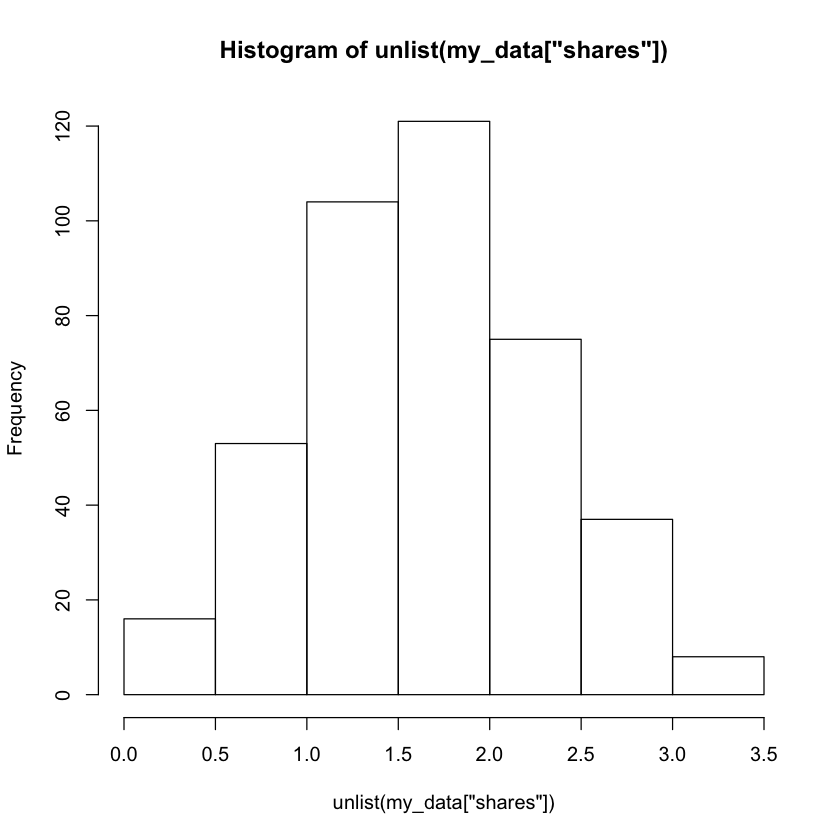

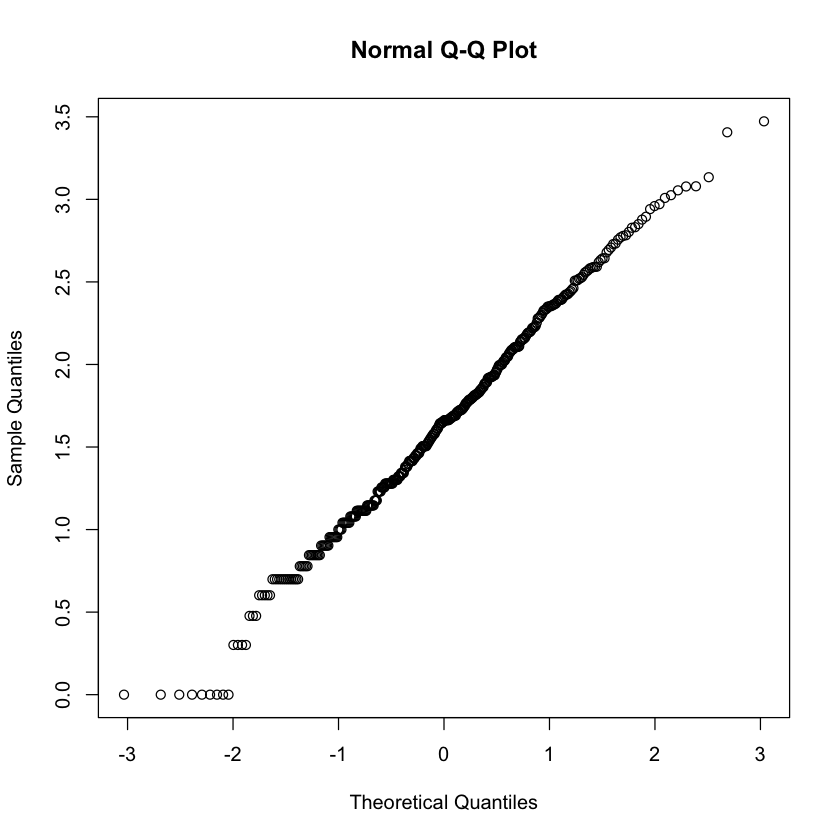

In [3]:
# plotting the normal distribution and probability plot
hist(unlist(my_data["shares"]))
qqnorm(unlist(my_data["shares"]))

In [4]:
# Principal Component Analysis (PCA)
# ----------------------------------
# to install the "psych" package, uncomment the two following lines:
# options(download.file.method = "wget")
# install.packages("psych")
library("psych")

# dropping the columns that we do not want in the regression analysis.
truth_labels <- my_data["label"]
drops <- c("X__1", "id", "DESPL", "label", "shares")
x <- my_data[, !(names(my_data) %in% drops)]
y <- my_data["shares"]

# printing eigenvalues to find the number of components for PCA
# print(eigen(cor(x)))

pca <- psych::principal(x, nfactors=22, rotate="varimax")
# print(pca$loadings, cutoff = 0.4, sort = TRUE)

# linear regression using the PCA scores
lin_model <- lm(unlist(y) ~ pca$scores + as.matrix(truth_labels))
summary(lin_model)


Call:
lm(formula = unlist(y) ~ pca$scores + as.matrix(truth_labels))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.84211 -0.42937  0.01476  0.42498  1.76033 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              1.4896590  0.0486399  30.626  < 2e-16 ***
pca$scoresRC2            0.0695861  0.0323385   2.152   0.0320 *  
pca$scoresRC1           -0.0285493  0.0323460  -0.883   0.3780    
pca$scoresRC6            0.0067498  0.0320431   0.211   0.8333    
pca$scoresRC5           -0.0245512  0.0321620  -0.763   0.4457    
pca$scoresRC3            0.0001801  0.0324238   0.006   0.9956    
pca$scoresRC4            0.0636687  0.0321395   1.981   0.0483 *  
pca$scoresRC12           0.0692495  0.0321231   2.156   0.0317 *  
pca$scoresRC9           -0.0096707  0.0322394  -0.300   0.7644    
pca$scoresRC16          -0.0336989  0.0321357  -1.049   0.2950    
pca$scoresRC11           0.0255809  0.0321603   0.795   0.4269    
pca$sco

In [6]:
# K-fold cross-validation for linear regression
# ----------------------------------------------
# to install the "caret" package, uncomment the two following lines:
# options(download.file.method = "wget")
# install.packages("caret")
library(caret)

drops <- c("X__1", "id", "DESPL")
x <- my_data[, !(names(my_data) %in% drops)]

set.seed(123)
# three different setup for cross validation
train.control <- trainControl(method = "LOOCV")
# train.control <- trainControl(method = "cv", number = 10)
# train.control <- trainControl(method = "repeatedcv", number = 10)
lin_model <- train(shares ~ ., data=x, method = "lm", trControl = train.control)
print(lin_model)
summary(lin_model)

Linear Regression 

414 samples
104 predictors

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 413, 413, 413, 413, 413, 413, ... 
Resampling results:

  RMSE       Rsquared    MAE     
  0.7260553  0.03504098  0.576029

Tuning parameter 'intercept' was held constant at a value of TRUE



Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.52183 -0.36582 -0.03454  0.35224  1.75584 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -9.830e+03  7.252e+03  -1.355 0.176254    
DESSC        8.054e-03  6.964e-03   1.156 0.248414    
DESWC       -2.856e-04  3.180e-04  -0.898 0.369792    
DESSL       -3.718e-02  1.869e+00  -0.020 0.984139    
DESSLd       9.669e-03  1.030e-02   0.939 0.348714    
DESWLsy      3.398e+03  2.308e+03   1.472 0.141967    
DESWLsyd     1.999e+00  1.008e+00   1.983 0.048243 *  
DESWLlt     -8.466e-02  4.432e-01  -0.191 0.848616    
DESWLltd    -8.881e-01  3.054e-01  -2.908 0.003902 ** 
PCNARz       7.486e+01  6.270e+01   1.194 0.233427    
PCNARp       2.036e-02  1.395e-02   1.459 0.145578    
PCSYNz       2.775e+01  6.456e+01   0.430 0.667600    
PCSYNp       5.472e-03  1.248e-02   0.439 0.661283    
PCCNCz      -2.925e+01  5.851e+01  -0.500 0.617490    
PCCNCp    

In [7]:
# Stepwise linear regression
truth_labels <- my_data["label"]
drops <- c("X__1", "id", "DESPL")
x <- my_data[, !(names(my_data) %in% drops)]

# a lower value of AIC suggests "better" model
lin_model <- lm(shares ~ ., data=x)
summary(step(lin_model, direction = "backward"))

Start:  AIC=-322.18
shares ~ DESSC + DESWC + DESSL + DESSLd + DESWLsy + DESWLsyd + 
    DESWLlt + DESWLltd + PCNARz + PCNARp + PCSYNz + PCSYNp + 
    PCCNCz + PCCNCp + PCREFz + PCREFp + PCDCz + PCDCp + PCVERBz + 
    PCVERBp + PCCONNz + PCCONNp + PCTEMPz + PCTEMPp + CRFNO1 + 
    CRFAO1 + CRFSO1 + CRFNOa + CRFAOa + CRFSOa + CRFCWO1 + CRFCWO1d + 
    CRFCWOa + CRFCWOad + CRFANP1 + CRFANPa + LSASS1 + LSASS1d + 
    LSASSp + LSASSpd + LSAGN + LSAGNd + LDTTRc + LDTTRa + LDMTLD + 
    LDVOCD + CNCAll + CNCCaus + CNCLogic + CNCADC + CNCTemp + 
    CNCTempx + CNCAdd + CNCPos + CNCNeg + SMCAUSv + SMCAUSvp + 
    SMINTEp + SMCAUSr + SMINTEr + SMCAUSlsa + SMCAUSwn + SMTEMP + 
    SYNLE + SYNNP + SYNMEDpos + SYNMEDwrd + SYNMEDlem + SYNSTRUTa + 
    SYNSTRUTt + DRNP + DRVP + DRAP + DRPP + DRPVAL + DRNEG + 
    DRGERUND + DRINF + WRDNOUN + WRDVERB + WRDADJ + WRDADV + 
    WRDPRO + WRDPRP1s + WRDPRP1p + WRDPRP2 + WRDPRP3s + WRDPRP3p + 
    WRDFRQc + WRDFRQa + WRDFRQmc + WRDAOAc + WRDFAMc + WRDCNCc +


Call:
lm(formula = shares ~ DESSC + DESWLsy + DESWLsyd + DESWLltd + 
    PCNARz + PCNARp + PCSYNz + PCCNCz + PCREFz + PCVERBz + PCCONNz + 
    CRFNO1 + CRFAO1 + CRFNOa + CRFAOa + CRFSOa + CRFCWO1 + CRFCWO1d + 
    CRFCWOa + CRFANP1 + LSASS1 + LSASSp + LSAGN + LDTTRc + LDMTLD + 
    LDVOCD + CNCAll + CNCCaus + CNCLogic + CNCADC + CNCAdd + 
    SMCAUSv + SMINTEp + SMCAUSr + SMCAUSlsa + SMCAUSwn + SMTEMP + 
    SYNLE + SYNNP + SYNMEDpos + SYNMEDwrd + SYNMEDlem + DRAP + 
    DRPP + DRPVAL + DRNEG + DRGERUND + WRDNOUN + WRDVERB + WRDADJ + 
    WRDPRO + WRDPRP1s + WRDPRP1p + WRDPRP3s + WRDPRP3p + WRDFRQc + 
    WRDFRQa + WRDFRQmc + WRDFAMc + WRDCNCc + WRDIMGc + WRDMEAc + 
    WRDPOLc + WRDHYPn + WRDHYPnv + RDFRE + RDFKGL + label, data = x)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.47929 -0.34834 -0.01112  0.36829  1.86860 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.152e+04  6.636e+03  -1.737  0.08335 .  
DESSC        2.450e-03  1.

In [14]:
# LASSO model
# install.packages("magrittr") # only needed the first time you use it
# install.packages("dplyr")    # alternative installation of the %>%
library(magrittr) # need to run every time you start R and want to use %>%
# library(dplyr)
library(glmnet)

drops <- c("X__1", "id", "DESPL")
x_init <- my_data[, !(names(my_data) %in% drops)]

# --------------------------------------
# split the data into train and test set
set.seed(123)
training.samples <- x_init$shares %>% createDataPartition(p = 0.8, list = FALSE)
train.data <- x_init[training.samples, ]
test.data <- x_init[-training.samples, ]

# predictor variables
x <- model.matrix(shares ~ ., train.data)[,-1]
# outcome variable
y <- train.data$shares

# --------------------------------------
# fitting the model

# set the seed for reproducibility
set.seed(123)
cv <- cv.glmnet(x, y, alpha = 1)

# display the best lambda value
cv$lambda.min

# fit the final model
model <- glmnet(x, y, alpha = 1, lambda = cv$lambda.min)

# display regression coefficients
coef(model)

# --------------------------------
# make prediction on the test data
x.test <- model.matrix(shares ~ ., test.data)[,-1]
predictions <- model %>% predict(x.test) %>% as.vector()

# -------------------------
# model performance metrics
data.frame(
    RMSE = RMSE(predictions, test.data$shares),
    Rsquare = R2(predictions, test.data$shares)
)

[1] 0.06059015

105 x 1 sparse Matrix of class "dgCMatrix"
                       s0
(Intercept)  1.3974360002
DESSC        .           
DESWC        .           
DESSL        .           
DESSLd       .           
DESWLsy      .           
DESWLsyd     0.1079121445
DESWLlt      .           
DESWLltd     .           
PCNARz       .           
PCNARp       .           
PCSYNz       .           
PCSYNp       .           
PCCNCz       .           
PCCNCp       .           
PCREFz       .           
PCREFp       .           
PCDCz        .           
PCDCp        .           
PCVERBz      .           
PCVERBp      .           
PCCONNz      .           
PCCONNp      .           
PCTEMPz      .           
PCTEMPp      .           
CRFNO1       .           
CRFAO1       .           
CRFSO1       .           
CRFNOa       .           
CRFAOa       .           
CRFSOa       .           
CRFCWO1      .           
CRFCWO1d     .           
CRFCWOa      .           
CRFCWOad     .           
CRFANP1      .       

RMSE,Rsquare
0.6532413,0.04840761
